In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Paso 1: Cargar el dataset
Films = pd.read_csv("C:/Users/Fede/Documents/Henry/Labs/Fede/Films.csv")


In [3]:
# Paso 2: Análisis Exploratorio de Datos (EDA)

In [4]:
# Estadísticas descriptivas
print(Films.describe())

             budget    popularity       revenue       runtime        return
count  3.365300e+04  33653.000000  3.365300e+04  33462.000000  3.365300e+04
mean   5.611797e+06      3.363319  1.456474e+07     95.329628  6.370944e+02
std    2.002683e+07      6.742307  7.385315e+07     38.627886  7.332001e+04
min    0.000000e+00      0.000000  0.000000e+00      0.000000  0.000000e+00
25%    0.000000e+00      0.465587  0.000000e+00     87.000000  0.000000e+00
50%    0.000000e+00      1.377641  0.000000e+00     95.000000  0.000000e+00
75%    0.000000e+00      4.727171  0.000000e+00    107.000000  0.000000e+00
max    3.800000e+08    547.488298  2.787965e+09   1140.000000  1.239638e+07


array([[<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'revenue'}>,
        <Axes: title={'center': 'runtime'}>],
       [<Axes: title={'center': 'return'}>, <Axes: >]], dtype=object)

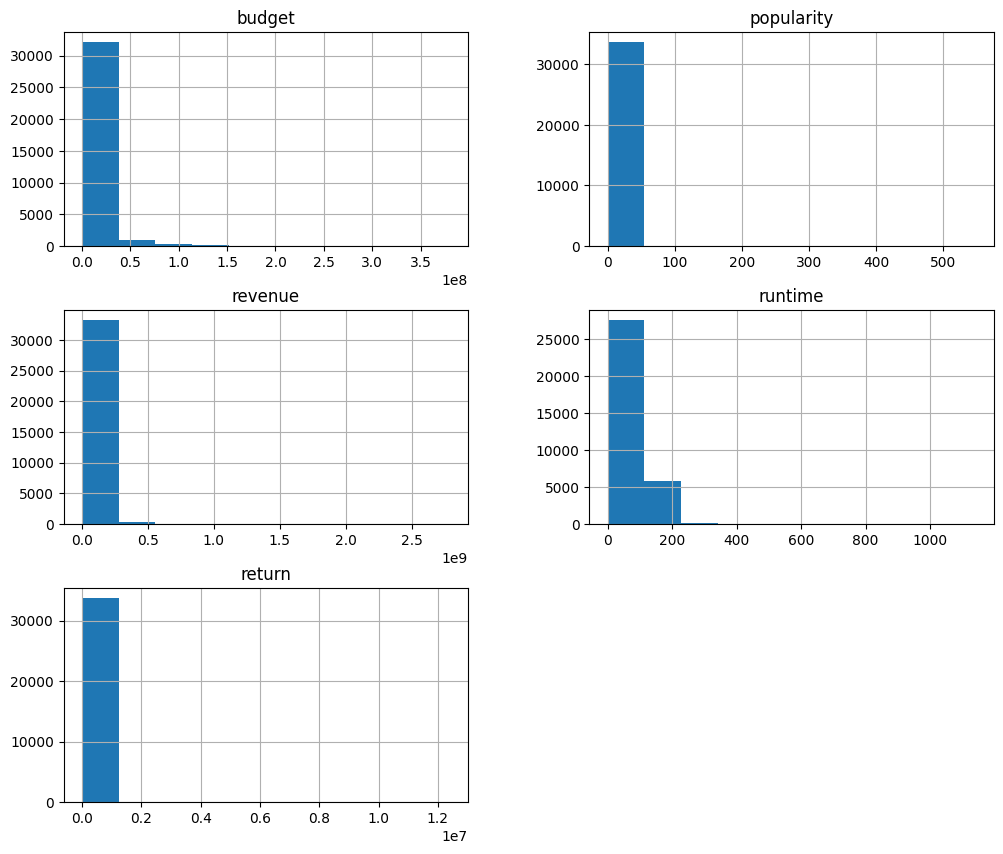

In [5]:
# Distribuciones de variables numéricas
Films.hist(figsize=(12, 10))

In [6]:
# Matriz de correlación
correlation_matrix = Films.corr()
print(correlation_matrix)

              budget  popularity   revenue   runtime    return
budget      1.000000    0.448958  0.772211  0.142918 -0.002425
popularity  0.448958    1.000000  0.506748  0.118777  0.000695
revenue     0.772211    0.506748  1.000000  0.109498  0.000679
runtime     0.142918    0.118777  0.109498  1.000000  0.001597
return     -0.002425    0.000695  0.000679  0.001597  1.000000


C:\Users\Fede\AppData\Local\Temp\ipykernel_10004\105386639.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Films.corr()


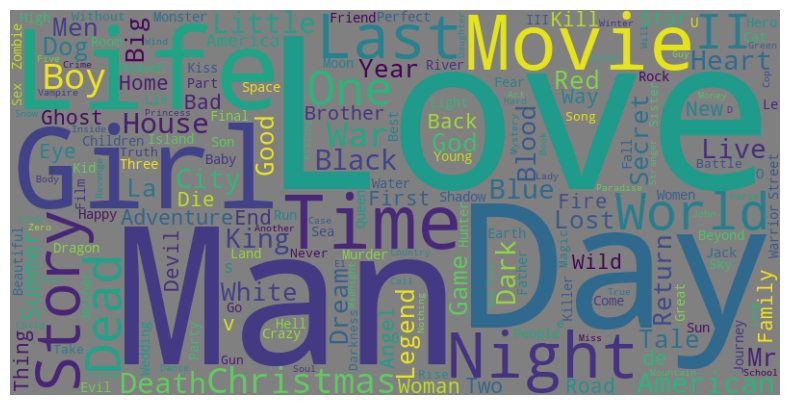

In [7]:
# Nube de palabras para los títulos de películas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_wordcloud = WordCloud(width=800, height=400, background_color='grey').generate(' '.join(Films['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
Films = pd.read_csv("C:/Users/Fede/Documents/Henry/Labs/Fede/Films.csv")

In [5]:
Columnas = ['belongs_to_collection', 'genres', 'release_date', 'original_language']
datos = Films[Columnas]

In [6]:
datos['release_date'] = pd.to_datetime(datos['release_date'])
datos['release_year'] = datos['release_date'].dt.year

C:\Users\Fede\AppData\Local\Temp\ipykernel_9932\4177903471.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['release_date'] = pd.to_datetime(datos['release_date'])
C:\Users\Fede\AppData\Local\Temp\ipykernel_9932\4177903471.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['release_year'] = datos['release_date'].dt.year


C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\

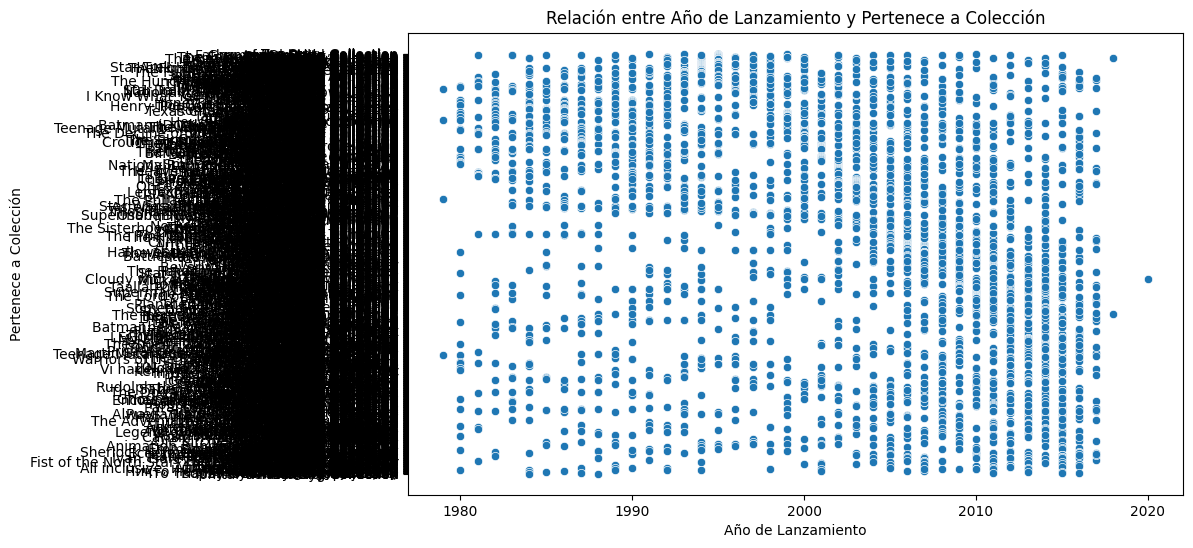

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos, x='release_year', y='belongs_to_collection')
plt.title('Relación entre Año de Lanzamiento y Pertenece a Colección')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Pertenece a Colección')
plt.show()

C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Fede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\

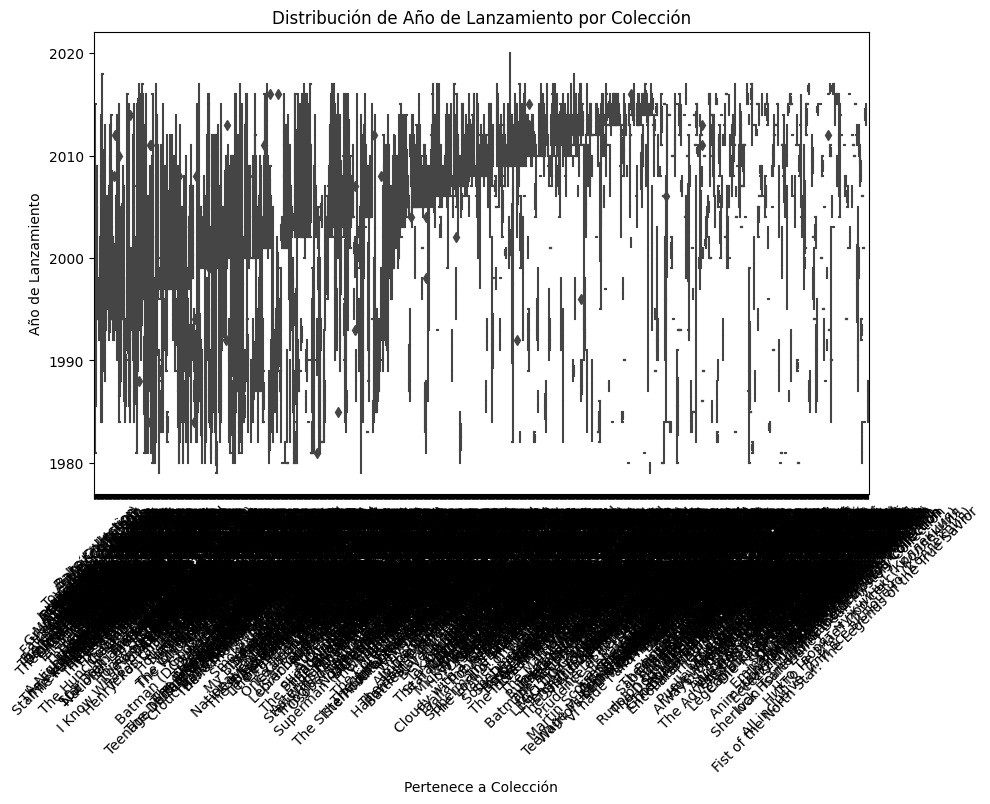

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos, x='belongs_to_collection', y='release_year')
plt.title('Distribución de Año de Lanzamiento por Colección')
plt.xlabel('Pertenece a Colección')
plt.ylabel('Año de Lanzamiento')
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


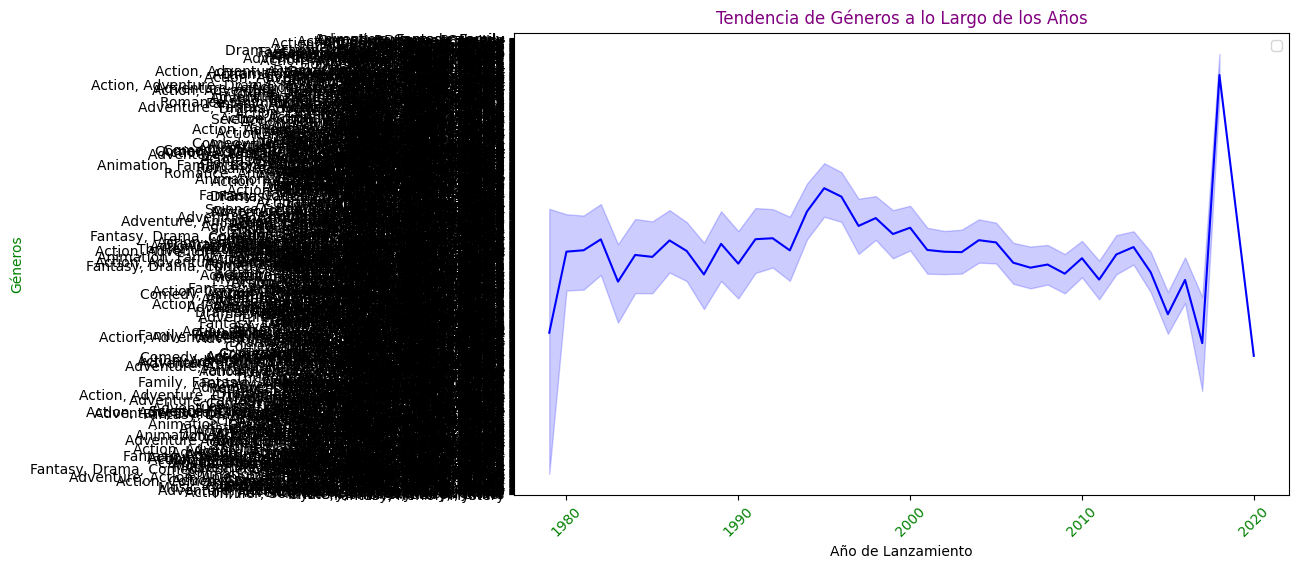

In [23]:
custom_colors = ['blue', 'green', 'red', 'purple', 'orange']

plt.figure(figsize=(10, 6))
sns.lineplot(data=datos, x='release_year', y='genres', color=custom_colors[0])
plt.title('Tendencia de Géneros a lo Largo de los Años', color='purple')  # Cambia el color del título
plt.xlabel('Año de Lanzamiento', color='black')  # Cambia el color del texto del eje x
plt.ylabel('Géneros', color='green')  # Cambia el color del texto del eje y
plt.xticks(rotation=45, color='orange')  # Cambia el color de las marcas en el eje x
plt.yticks(color='black')  # Cambia el color de las marcas en el eje y
# Cambiar el color del nombre de la leyenda
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('green')  # Cambia el color del nombre de la leyenda
    
# Cambiar el color de los nombres de las columnas en el eje x
plt.xticks(rotation=45, color='green')  # Cambia el color de las marcas en el eje x


plt.show()